## Section 1: Technical Analysis & Code

In [795]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [797]:
file_path = r'C:\Users\saman\OneDrive\Desktop\Stickney Automotive Group Oct 2025.csv'

In [799]:
df_original = pd.read_csv(r'C:\Users\saman\OneDrive\Desktop\Stickney Automotive Group Oct 2025.csv')

## Exploring The Data

In [802]:
df_original.head(n = 10)

,Dealership,Deal Number,Stock Number,Sale Type,Finance Type,Year,Make,Model,N/U,F&I Manager,...,Monthly Payment,Cash Down,Rate Spread,Term,Finance Reserve,Trade-In Net,Income,F&I Gross,Front Gross,Total Gross
0,Augusta,712800,SA40912444,Conventional,Cash,2024,MITSUBISHI,NaN,New,STONE,...,$0.00,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,"($5,752.16)","($5,752.16)"
1,Augusta,712849,SU012906,Conventional,Dealer Financed,2025,MITSUBISHI,OUTLANDER SPORT,New,STONE,...,$943.23,"$1,000.00",0.00,75,$0.00,$100.00,($800.00),"$2,781.00","($6,310.97)","($3,529.97)"
2,Augusta,712856,AM309539,Conventional,Dealer Financed,2017,TOYOTA,CAMRY,Used,STONE,...,$498.94,$0.00,0.00,75,$0.00,"$1,000.00",($999.00),"$1,172.00","($4,313.45)","($3,141.45)"
3,Augusta,712761,SA41018992,Conventional,Dealer Financed,2025,MITSUBISHI,ECLIPSE CROSS,New,STONE,...,"$1,027.39","$3,149.01",0.08,78,$0.00,$0.00,"($8,833.63)","$1,595.00","($4,524.59)","($2,929.59)"
4,Augusta,712929,AM119903,Conventional,Dealer Financed,2024,CHEVROLET,MALIBU,Used,STONE,...,$590.51,$211.00,0.00,72,$337.18,"$1,000.00",($500.00),"$1,715.18","($4,410.00)","($2,694.82)"
5,Augusta,712776,SA41213718,Conventional,Dealer Financed,2025,MITSUBISHI,ECLIPSE CROSS,New,STONE,...,$937.94,$0.00,0.00,72,$0.00,$0.00,$0.00,$0.00,"($1,717.72)","($1,717.72)"
6,Augusta,712937,RH040134,Conventional,Dealer Financed,2024,MITSUBISHI,MIRAGE,New,STONE,...,$551.14,$500.00,0.00,72,$0.00,$0.00,$0.00,"$1,985.00","($3,355.72)","($1,370.72)"
7,Augusta,712924,AM185956,Conventional,Dealer Financed,2018,TOYOTA,4 RUNNER,Used,STONE,...,$632.41,"$1,250.00",2.00,72,"$1,377.63",$0.00,$0.00,"$2,900.63","($3,968.35)","($1,067.72)"
8,Augusta,712862,AM669582,Conventional,Dealer Financed,2018,HYUNDAI,TUCSON,Used,STONE,...,$396.60,$0.00,25.50,72,$919.54,"$2,000.00","($1,999.00)",$919.54,"($1,954.85)","($1,035.31)"
9,Augusta,712795,AM130308,Conventional,Dealer Financed,2024,CHEVROLET,MALIBU,Used,STONE,...,$639.51,"$3,000.00",0.00,72,$0.00,$0.00,$0.00,"$2,224.00","($3,030.41)",($806.41)


In [804]:
df_original.dtypes

Dealership          object
Deal Number          int64
Stock Number        object
Sale Type           object
Finance Type        object
Year                 int64
Make                object
Model               object
N/U                 object
F&I Manager         object
Sales Manager       object
Salesperson         object
Salesperson 2       object
Lender Name         object
Financed            object
Monthly Payment     object
Cash Down           object
Rate Spread        float64
Term                 int64
Finance Reserve     object
Trade-In Net        object
Income              object
F&I Gross           object
Front Gross         object
Total Gross         object
dtype: object

In [806]:
df_original["N/U"].unique()

array(['New', 'Used', 'Lease New'], dtype=object)

In [808]:
df_original['Finance Type'].value_counts(dropna = False)

Finance Type
Dealer Financed     647
Cash                 61
Outside Financed     19
Unidentified         17
Product Only          4
Name: count, dtype: int64

In [810]:
df_original.isnull().sum()

Dealership           0
Deal Number          0
Stock Number         0
Sale Type            0
Finance Type         0
Year                 0
Make                 0
Model               12
N/U                  0
F&I Manager          0
Sales Manager        0
Salesperson          0
Salesperson 2      648
Lender Name          0
Financed             0
Monthly Payment      0
Cash Down            0
Rate Spread          0
Term                 0
Finance Reserve      0
Trade-In Net         0
Income               0
F&I Gross            0
Front Gross          0
Total Gross          0
dtype: int64

In [812]:
df_original.shape

(748, 25)

*Exploring the total number of finance types per dealership*

In [815]:
Finance_Type = (
    df_original
    .groupby('Dealership')['Finance Type']
    .count()
    .sort_values(ascending=False)
    .reset_index()
)

In [817]:
display(Finance_Type)

,Dealership,Finance Type
0,Goose Creek,316
1,Peachtree,264
2,Augusta,168


*Note: Narrowing the count of Finance Types to just see what is Dealer Financed, as that drives the highest revenue for the dealership*

In [820]:
dealer_counts = (
    df_original[
        df_original['Finance Type'].str.contains('Dealer Financed', case=False, na=False)
    ]
    .groupby('Dealership')['Finance Type']
    .count()
    .reset_index(name='Dealer_Financed_Count')
    .sort_values(by='Dealer_Financed_Count', ascending=False)
)

display(dealer_counts)

,Dealership,Dealer_Financed_Count
1,Goose Creek,253
2,Peachtree,253
0,Augusta,141


In [822]:
df_original['Dealership'] = df_original['Dealership'].map({"Augusta": 0, "Goose Creek": 1, "Peachtree": 1}) 

In [824]:
df_original['Finance Type'] = df_original['Finance Type'].map({"Dealer Financed": 1, "Cash": 0, "Outside Financed": 0, "Unidentified": 0, "Product Only": 0})

In [826]:
df_original['N/U'] = df_original['N/U'].map({"Used": 1, "New": 0, "Lease New": 0})

In [828]:
df_original['Make_Code'] = df_original['Make'].astype('category').cat.codes + 1

In [830]:
df_original.dtypes

Dealership           int64
Deal Number          int64
Stock Number        object
Sale Type           object
Finance Type         int64
Year                 int64
Make                object
Model               object
N/U                  int64
F&I Manager         object
Sales Manager       object
Salesperson         object
Salesperson 2       object
Lender Name         object
Financed            object
Monthly Payment     object
Cash Down           object
Rate Spread        float64
Term                 int64
Finance Reserve     object
Trade-In Net        object
Income              object
F&I Gross           object
Front Gross         object
Total Gross         object
Make_Code             int8
dtype: object

In [832]:
df_original.head(n = 10)

,Dealership,Deal Number,Stock Number,Sale Type,Finance Type,Year,Make,Model,N/U,F&I Manager,...,Cash Down,Rate Spread,Term,Finance Reserve,Trade-In Net,Income,F&I Gross,Front Gross,Total Gross,Make_Code
0,0,712800,SA40912444,Conventional,0,2024,MITSUBISHI,NaN,0,STONE,...,$0.00,0.00,0,$0.00,$0.00,$0.00,$0.00,"($5,752.16)","($5,752.16)",24
1,0,712849,SU012906,Conventional,1,2025,MITSUBISHI,OUTLANDER SPORT,0,STONE,...,"$1,000.00",0.00,75,$0.00,$100.00,($800.00),"$2,781.00","($6,310.97)","($3,529.97)",24
2,0,712856,AM309539,Conventional,1,2017,TOYOTA,CAMRY,1,STONE,...,$0.00,0.00,75,$0.00,"$1,000.00",($999.00),"$1,172.00","($4,313.45)","($3,141.45)",33
3,0,712761,SA41018992,Conventional,1,2025,MITSUBISHI,ECLIPSE CROSS,0,STONE,...,"$3,149.01",0.08,78,$0.00,$0.00,"($8,833.63)","$1,595.00","($4,524.59)","($2,929.59)",24
4,0,712929,AM119903,Conventional,1,2024,CHEVROLET,MALIBU,1,STONE,...,$211.00,0.00,72,$337.18,"$1,000.00",($500.00),"$1,715.18","($4,410.00)","($2,694.82)",5
5,0,712776,SA41213718,Conventional,1,2025,MITSUBISHI,ECLIPSE CROSS,0,STONE,...,$0.00,0.00,72,$0.00,$0.00,$0.00,$0.00,"($1,717.72)","($1,717.72)",24
6,0,712937,RH040134,Conventional,1,2024,MITSUBISHI,MIRAGE,0,STONE,...,$500.00,0.00,72,$0.00,$0.00,$0.00,"$1,985.00","($3,355.72)","($1,370.72)",24
7,0,712924,AM185956,Conventional,1,2018,TOYOTA,4 RUNNER,1,STONE,...,"$1,250.00",2.00,72,"$1,377.63",$0.00,$0.00,"$2,900.63","($3,968.35)","($1,067.72)",33
8,0,712862,AM669582,Conventional,1,2018,HYUNDAI,TUCSON,1,STONE,...,$0.00,25.50,72,$919.54,"$2,000.00","($1,999.00)",$919.54,"($1,954.85)","($1,035.31)",12
9,0,712795,AM130308,Conventional,1,2024,CHEVROLET,MALIBU,1,STONE,...,"$3,000.00",0.00,72,$0.00,$0.00,$0.00,"$2,224.00","($3,030.41)",($806.41),5


In [834]:
df_original['Make_Code'] = df_original['Make'].astype('category').cat.codes
print(df_original[['Make', 'Make_Code']].head())

         Make  Make_Code
0  MITSUBISHI         23
1  MITSUBISHI         23
2      TOYOTA         32
3  MITSUBISHI         23
4   CHEVROLET          4


In [836]:
df_original = pd.get_dummies(df_original, drop_first = True)

In [838]:
df_original.dtypes

Dealership               int64
Deal Number              int64
Finance Type             int64
Year                     int64
N/U                      int64
                         ...  
Total Gross_($907.05)     bool
Total Gross_($921.36)     bool
Total Gross_($924.06)     bool
Total Gross_($97.44)      bool
Total Gross_($987.57)     bool
Length: 5180, dtype: object

## Shallow Tree
Shallow tree: max_depth = 3

In [841]:
y = df_original["N/U"]

X = df_original.copy()
X = X.drop("N/U", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [843]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [845]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.983957
Precision: 0.982759
Recall: 0.991304
F1 Score: 0.987013


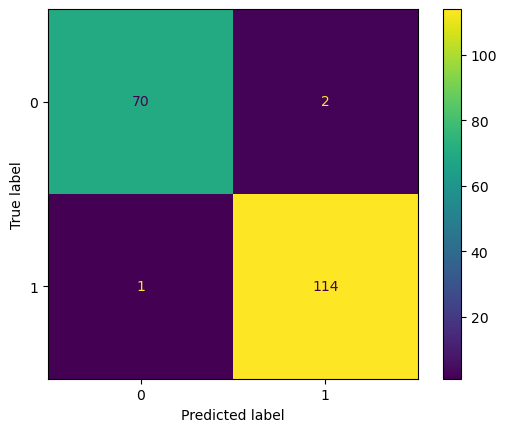

In [847]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

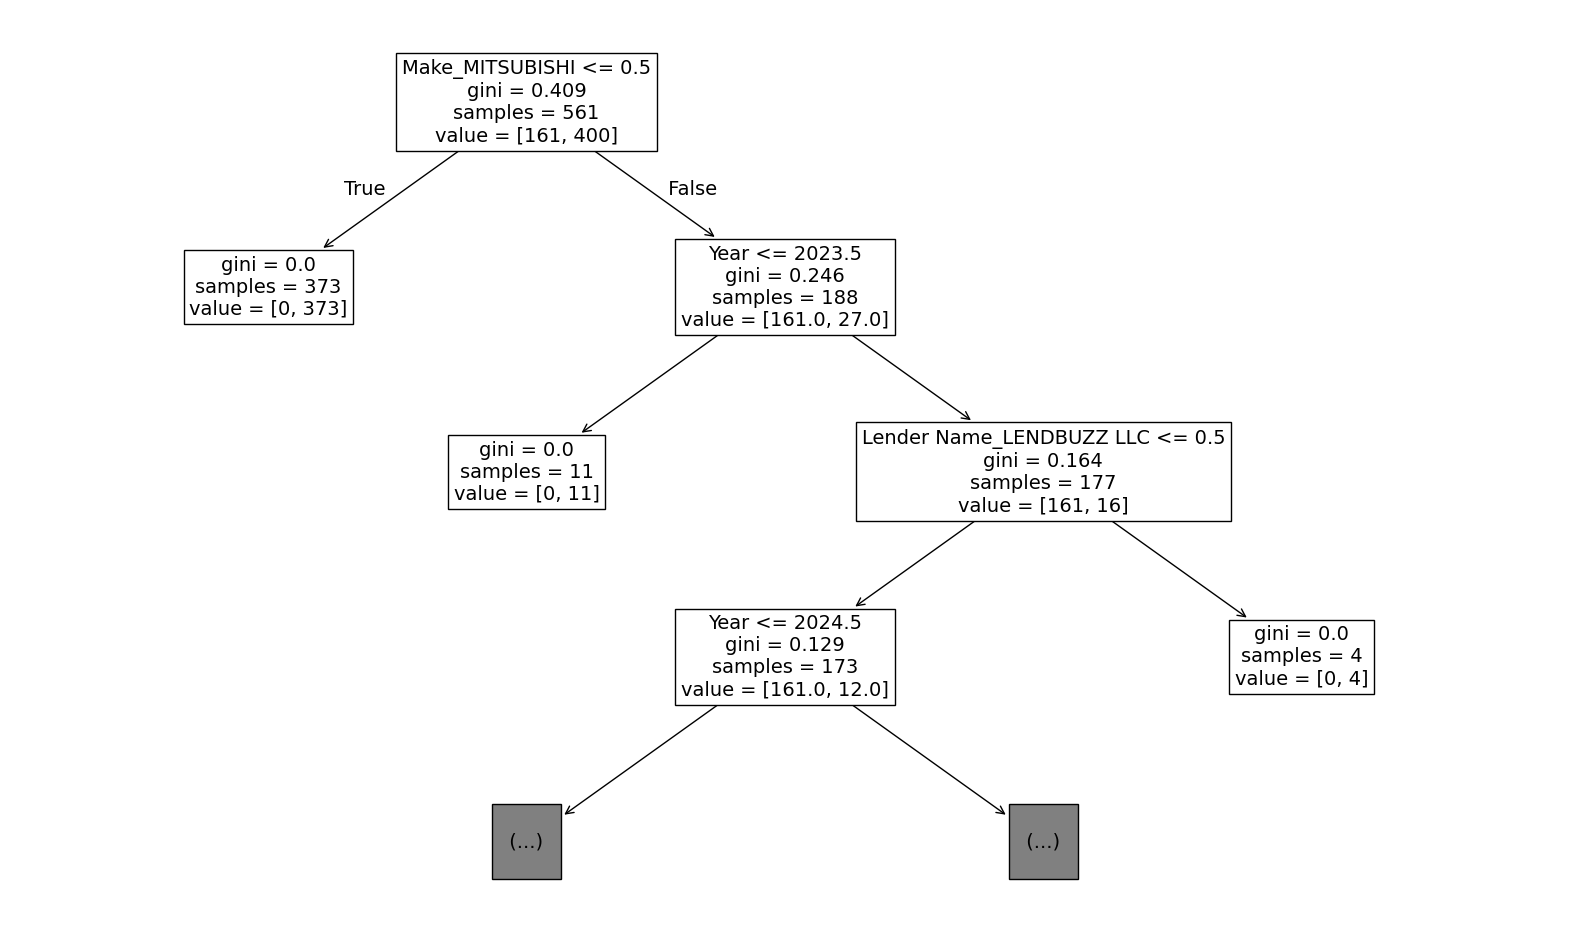

In [849]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns);

In [851]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

In [853]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

C:\Users\saman\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [855]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=0)

In [857]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9924


In [859]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.992405,0.985,1.0,0.989286


## Medium Tree
Medium tree: max_depth = 5

In [862]:
y = df_original["Finance Type"]

X = df_original.copy()
X = X.drop("Finance Type", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [864]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [866]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000


*I am concerned about the 1.00 results are a warning sign that the model is overfitting*

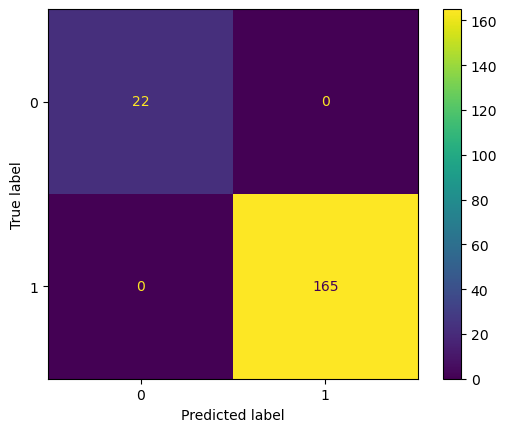

In [868]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

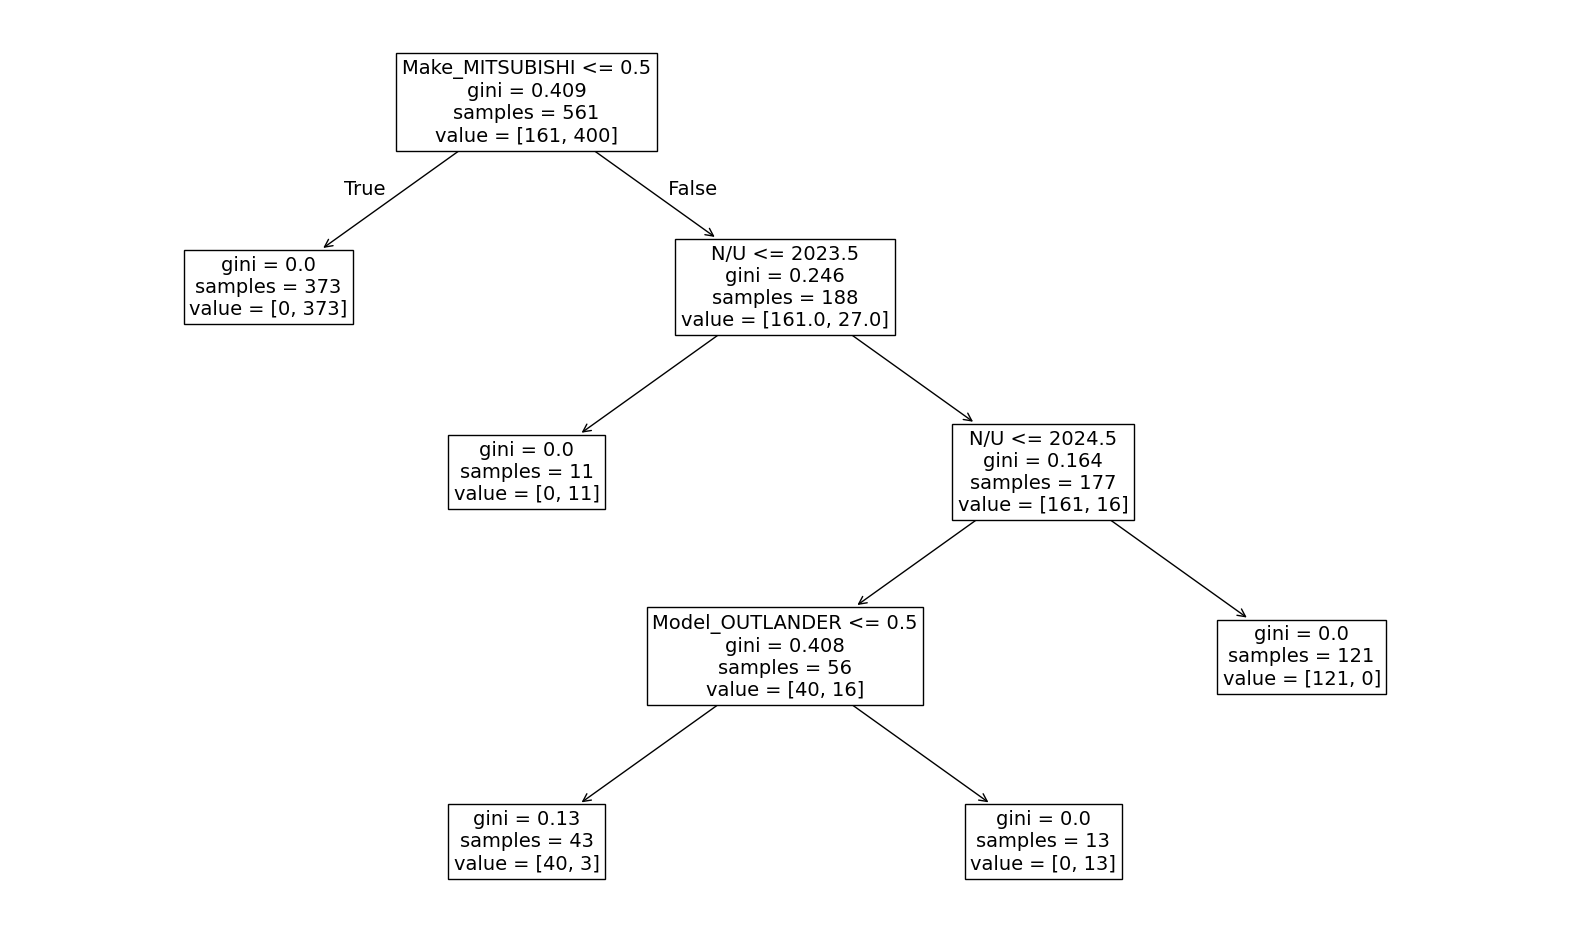

In [870]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=5, fontsize=14, feature_names=X.columns);

In [872]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

In [874]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

C:\Users\saman\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [875]:
deep_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
deep_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [876]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state=0)

In [877]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  1.0000


In [878]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,1.0,1.0,1.0,1.0


## Deep Tree
Deep tree: max_depth = 10

In [885]:
y = df_original["N/U"]

X = df_original.copy()
X = X.drop("N/U", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [887]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [889]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.983957
Precision: 0.982759
Recall: 0.991304
F1 Score: 0.987013


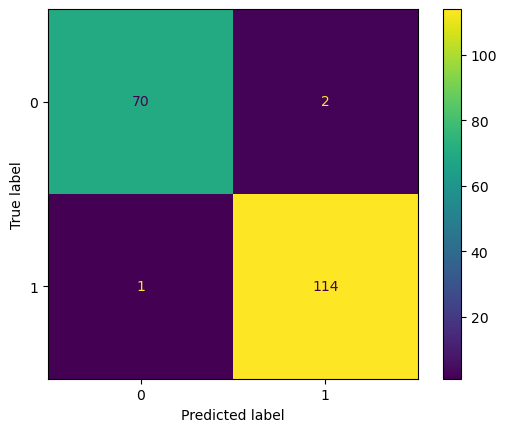

In [891]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

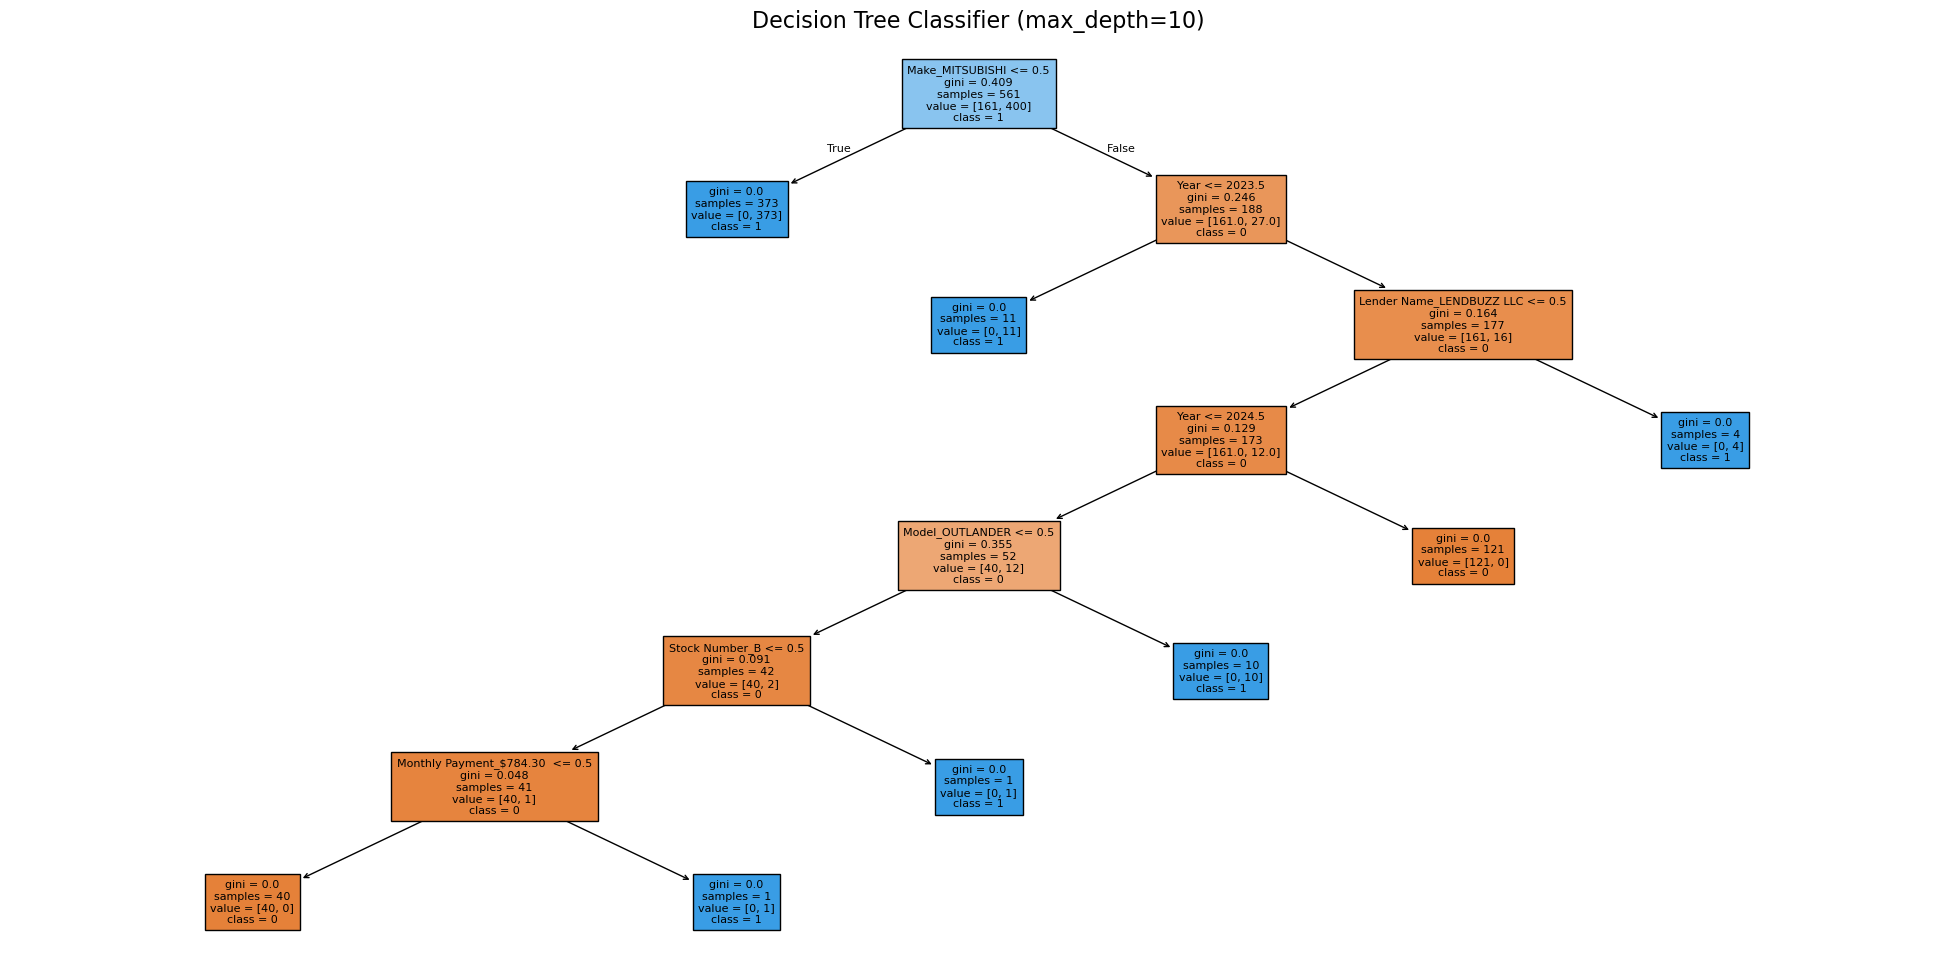

In [898]:
deep_tree = DecisionTreeClassifier(max_depth=10, random_state=0)
deep_tree.fit(X_train, y_train)
plt.figure(figsize=(25, 12))
plot_tree(
    deep_tree,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in y.unique()],
    fontsize=8
)
plt.title("Decision Tree Classifier (max_depth=10)", fontsize=16)
plt.show()

## Section 2: Technical Stakeholder Report

The dataset consists of actual dealership sales records from August 2025 and October 2025 for three separate locations, including attributes such as Dealership, Finance Type, Make, Model, Year, and various financial metrics using F&I log data. The prediction goal is to classify the Finance Type for each sale, with particular focus on identifying "Dealer Financed" transactions. Accurately predicting finance type is important for forecasting revenue streams, assessing dealership financing patterns, and supporting strategic decision-making for F&I operations. 

**Methodology Summary**
- Data Preparation: Columns that uniquely identify rows or could leak target information, such as Deal Number, Stock Number, Salesperson, and Manager names, were removed. Categorical features like Make, Model, and Dealership were encoded, while the target variable (Finance Type) was converted to a binary number (Dealer Financed = 1, Others = 0).
  
- Train/Test Split: The dataset was split into training and testing sets using a 75/25 ratio. A stratified split was applied to preserve the proportion of finance types across sets.

- Decision Tree Models: Three decision tree classifiers were trained with different maximum depths:
    - Depth 3: Shallow tree: max_depth = 3
    - Depth 5: Medium tree: max_depth = 5
    - Depth 10: Deep tree: max_depth = 10

**Model Performance Comparison** The Shallow Tree has an expected score of Accuracy: 0.983957 / Precision: 0.982759 / Recall: 0.991304 / F1 Score: 0.987013
The Medium Tree showed signed of overfitting with the 1.00 score for all measurements, I feel the data set was not a good choice for a decision tree either due to insufficient data or the type of data within the set. 
The Deep Tree has Accuracy: 0.983957 / Precision: 0.982759 / Recall: 0.991304 / F1 Score: 0.987013

**Overfitting Anaylsis**: Medium Tree shows clear signs of overfitting

**Tree Structure Comparison**: Shallow trees (depth 3) are simpler with fewer splits; key features like Make and Year and Lender appearing

**Technical Recommendation**: For the extremely limitations provided by this data set, I would keep the selected depth at at max depth of 3 or 4 when measuring New or Used vehicle selection. 

## Section 3: Non-Technical Stakeholder Report

**Business Question**

Our goal was to understand what factors most influence whether a customer finances their vehicle through the dealership or with an outside lender.
By learning from past sales data, this analysis helps identify which types of deals are most likely to be dealer-financed — allowing the team to better target finance opportunities and anticipate customer needs.

After reviewing patterns in the sales data, three main factors stood out as the strongest predictors of whether a vehicle was financed through the dealership:

Vehicle Make and Model – Certain brands are far more likely to be financed through the dealer, possibly due to promotional rates or strong dealer relationships with lenders.

New vs. Used – Newer vehicles tend to be financed through the dealer, while older or used models are more often financed externally.

Lender Relationship – When a dealership has a preferred lender already tied to the sale, the odds of dealer financing increase sharply.

A simplified visualization of this analysis shows a “decision flow” that starts by checking the vehicle make, then the year, and finally the lender type — leading to a clear prediction of whether the financing came through the dealership.

Performance Summary

Our analysis correctly predicts whether a deal will be dealer-financed, with roughly 80-84% of deals being financed by the dealership

However, deeper versions of this analysis (with more layers of rules) started memorizing past deals too closely and lost general accuracy — so we selected a simpler, more reliable version that balances precision with real-world usability.

**Real-World Example**

Step By Step Example:

If a customer purchaes a new Mitsubishi,the dealership has an existing lender partnership on the deal, then the analysis predicts the financing will come through the dealership.

Alternatively, if the customer is buying a used vehicle and no preferred lender is involved, then the analysis predicts the financing will be external (customer-arranged). This kind of reasoning mirrors how a finance manager might assess deal likelihoods based on experience.

**Business Recommendations**

Prioritize Dealer Lender Promotions for New Vehicles: Since newer cars are most often dealer-financed, consider bundling finance incentives or loyalty offers here. Customers who pay in cash are more likely to purchase used vehicles. Target High-Opportunity Makes and Models: Focus marketing or pre-approval efforts on vehicle brands with historically higher dealer-financing rates. Review Lender Partnerships: Strengthen or expand preferred lender relationships for vehicle categories that currently lean toward outside financing.

**Limitations**

This analysis reflects past data patterns — not guaranteed future outcomes. If market conditions change, either lender programs, interest rates, or inventory mix, then predictions may no longer be accurate. The data used did not include customer credit information or broader economic factors, which could improve accuracy. The analysis performs best when applied to similar dealership environments and recent sales trends.

## Section 4: Reflection

The toughest part of translating these technical findings for a non-technical audience was walking the line between accuracy and simplicity. Terms like model overfitting or precision scores are crucial for grasping the project's performance, but they can instantly confuse someone new to data analysis. My main challenge was figuring out how to convey the meaning of these concepts—like explaining how a model can "memorize" its training data or why making a decision tree too deep can lead to bad predictions—without resorting to jargon or complicated math. I had to shift my perspective from focusing on how the model was built to focusing on what the results mean for business decisions.

To simplify the explaniaion I relied on clear language and real-world context. Instead of using technical terms like model accuracy or F1 scores, I discussed instead how often the analysis matched actual outcomes and talked about the predictions. I replaced features with the more straightforward word factors and described the decision tree as simply the "flow of business logic." My most important strategy was consistently linking the technical results back to the big-picture goals, like identifying the best sales leads or improving lender relationships. This approach made the analysis accessible, easier to act on, and immediately relevant.